# Анализ имён

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab
%matplotlib inline
import os

In [4]:
PATH = 'babynames/'
df = pd.DataFrame(columns=['name','sex','num','year'])
for filename in os.listdir(PATH):
    with open(PATH + filename, 'r') as f:
        df_t = pd.read_csv(f, names = ['name','sex','num'])
        df_t['year'] = filename[3:7]
        df = df.append(df_t)

In [5]:
df.head()

,name,sex,num,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


## Сгруппируйте данные по полу и году и визуализируйте общую динамику рождаемости обоих полов

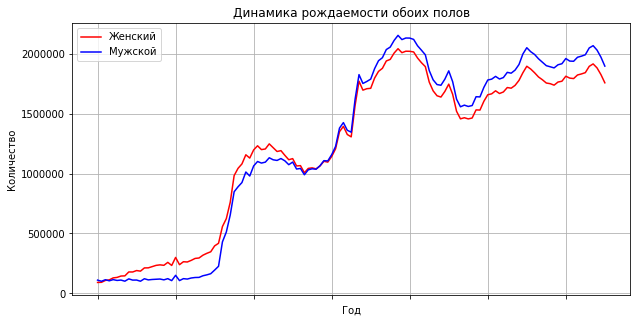

In [36]:
table = df.pivot_table(index='year', values='num', columns='sex', aggfunc=sum)
table['F'].plot(figsize=(10, 5), legend=True, label='Женский', color='red')
table['M'].plot(figsize=(10, 5), legend=True, label='Мужской', color='blue')
plt.ylabel('Количество');
plt.xlabel('Год');
plt.title('Динамика рождаемости обоих полов')
plt.grid(True)

## Найдите самые популярные имена за всю историю

In [37]:
table_males = df[df['sex']=='M'].pivot_table(index='name', values='num', aggfunc=sum)
table_females = df[df['sex']=='F'].pivot_table(index='name', values='num', aggfunc=sum)

In [38]:
# Мужские имена
table_males.sort_values('num', ascending=False).head(10)

,num
name,
James,5049727
John,5040319
Robert,4767995
Michael,4243903
William,3986586
David,3525961
Richard,2542735
Joseph,2519280
Charles,2335387


In [39]:
# Женские имена
table_females.sort_values('num', ascending=False).head(10)

,num
name,
Mary,4103935
Patricia,1568742
Elizabeth,1561874
Jennifer,1455078
Linda,1448771
Barbara,1431316
Margaret,1232653
Susan,1118932
Dorothy,1104280
